In [1]:
import minigrid
import os
from pydantic import BaseModel, Field
from typing import Literal, List
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor
from functools import partial
from rich import print as rprint
from IPython.display import Markdown, display

try:
    _SETUP
    print("Running on folder: ", os.getcwd())
except NameError:
    _SETUP = True
    os.chdir("..")
    print("Running on folder: ", os.getcwd())

from llm.structured import create
import gymnasium
from llm.structured import create, create_iterable, create_sequence
from minigrid.wrappers import RGBImgPartialObsWrapper

Running on folder:  /Users/andre/research/odsc


/Users/andre/research/odsc/.venv/lib/python3.12/site-packages/pydantic/_internal/_config.py:345: UserWarning: Valid config keys have changed in V2:
* 'fields' has been removed
  warnings.warn(message, UserWarning)


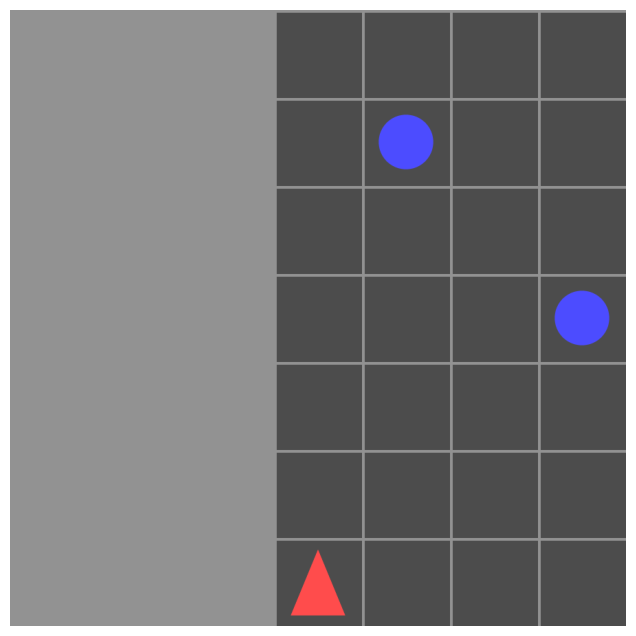

In [44]:
from utils.display import display_image

env = gymnasium.make("MiniGrid-Dynamic-Obstacles-16x16-v0", render_mode="rgb_array")
env = RGBImgPartialObsWrapper(env, tile_size=128)
obs, info = env.reset()
display_image(obs["image"])

In [83]:
from utils.display import rgb_array_to_base64_image, base64_to_image_url_message

prompt = """You are in a grid environment. You are the red arrow. There are obstacles in the environment. Create a full transcription of the enviroment you observe. Use a markdown table to represent the environment.

Use the following encoding:
Arrow: Agent
O: Obstacle
.: Empty cell.
G: Goal.

Point the arrow in the direction that the agent is facing.

Be very careful as the dividing lines between the cells are not always visible."""

base64image = rgb_array_to_base64_image(obs["image"])

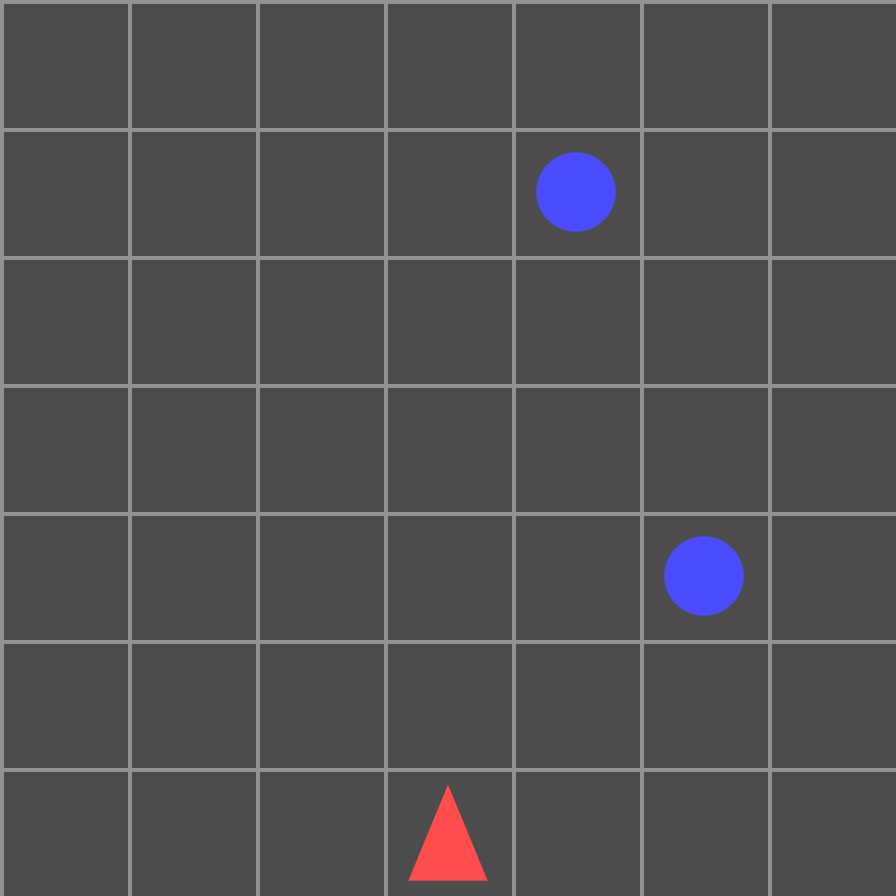

In [84]:
from IPython.display import Markdown, display

display(Markdown(f"![image]({base64image})"))

{'role': 'user',
 'content': [{'type': 'image_url',
   'image_url': {'url': ''},
   'detail': 'high'},
  {'type': 'text',
   'text': 'You are in a grid environment. You are the red arrow. There are obstacles in the environment. Create a full transcription of the enviroment you observe. Use a markdown table to represent the environment.\n\nUse the following encoding:\nArrow: Agent\nO: Obstacle\n.: Empty cell.\nG: Goal.\n\nPoint the arrow in the direction that the agent is facing.\n\nBe very careful as the dividing lines between the cells are not always visible.'}]}
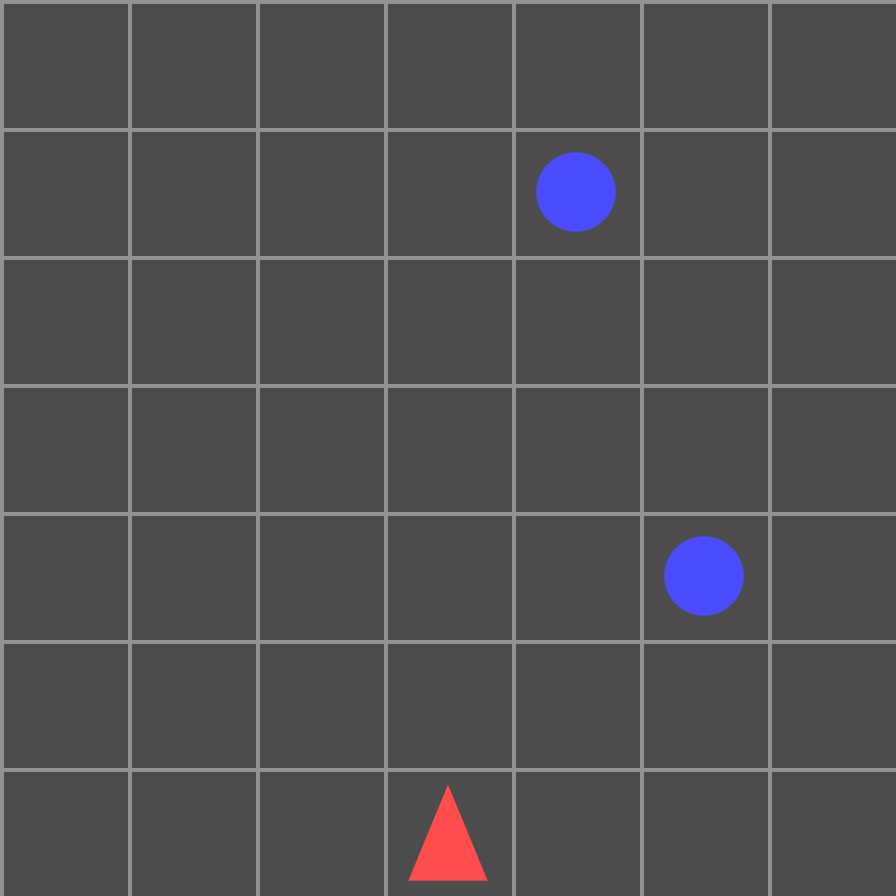

In [85]:
base64_to_image_url_message(base64image, prompt)

In [86]:
from llm.reasoning import run, extract_response, extract_thoughts

response = run([base64_to_image_url_message(base64image, prompt)])

In [87]:
from llm.reasoning import run, extract_response, extract_thoughts

In [88]:
Markdown(extract_response(response))

Here is the transcription of the environment:

```markdown
| . | . | . | . | . | . | . |
| . | . | . | O | . | . | . |
| . | . | . | . | . | . | . |
| . | . | . | . | O | . | . |
| . | . | . | . | . | . | . |
| . | . | . | . | . | . | . |
| . | . | . | . | Agent↑ | . | . |
```

In [89]:
extract_thoughts(response)

'\nTo transcribe the environment, I will carefully analyze the grid to identify the position of the agent, obstacles, and empty cells. The agent (red arrow) is pointing upward, and there are two blue circular obstacles. I will ensure to count each cell carefully to avoid errors caused by the faint dividing lines between the cells.\n'

In [90]:
env.action_space.sample()

np.int64(1)

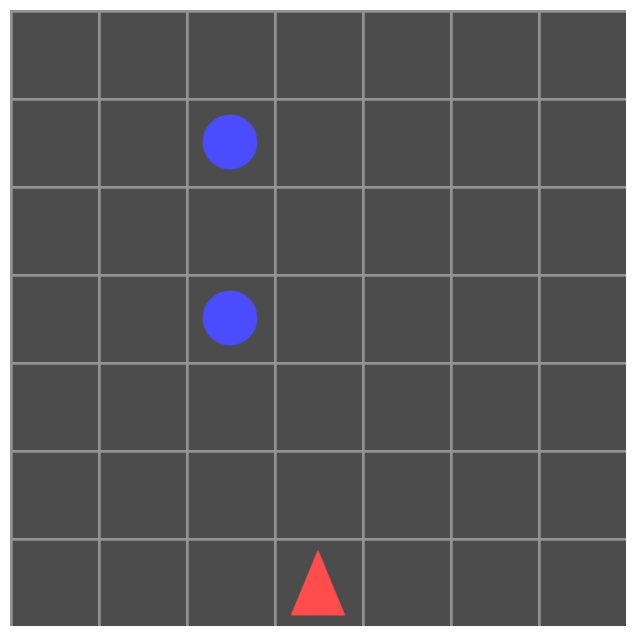

In [94]:
obs, reward, terminated, truncated, info = env.step(2)
display_image(obs["image"])